In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import dates as mat_dates
from matplotlib.ticker import FuncFormatter, PercentFormatter
import math
pd.options.mode.chained_assignment = None
pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
calendar_df = pd.read_csv('data/calendar.csv')
sales_df = pd.read_csv('data/sales_train_validation.csv')
sales_df =sales_df[sales_df['cat_id'] =='HOBBIES' ].reset_index()
prices_df = pd.read_csv('data/sell_prices.csv')
prices_df['cat_id'] =prices_df['item_id'].str[:7]
prices_df=prices_df[prices_df['cat_id'] =='HOBBIES' ].reset_index()

In [3]:
merge_df = pd.melt(sales_df, id_vars=['id','item_id','dept_id','cat_id','store_id','state_id'],
                         var_name='d',value_name='sales')
merge_df = merge_df.merge(calendar_df,on='d',how='left')
merge_df['date'] = pd.to_datetime(merge_df['date'])

# Revenue generated for each product category, each state, each store, each year

In [5]:
revenue_df = merge_df.merge(prices_df,how='left',on=['store_id','item_id','wm_yr_wk'])
revenue_df['sell_price'] = revenue_df['sell_price'].replace(np.nan,0)
revenue_df['revenue'] = revenue_df.sales*revenue_df.sell_price


In [7]:
store_revenue = revenue_df.groupby('store_id').agg({'revenue':'sum'}).reset_index() 
state_revenue = revenue_df.groupby('state_id').agg({'revenue':'sum'}).reset_index() 
year_revenue = revenue_df.groupby('year').agg({'revenue':'sum'}).reset_index() 
top20_revenue_prods = revenue_df['revenue'].sort_values(ascending=False).iloc[:10] 
top20_revenue_prods = revenue_df.loc[list(top20_revenue_prods.index)]

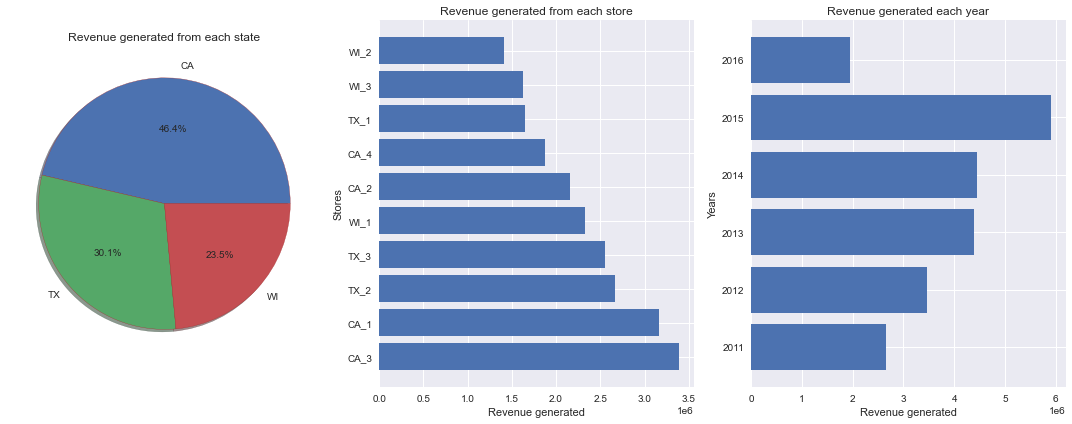

In [10]:
""" Plot of the revenue generated for each product category, each state, each store, each year """

store_revenue = store_revenue.sort_values(by='revenue',ascending=False)
state_revenue = state_revenue.sort_values(by='revenue',ascending=False)
year_revenue = year_revenue.sort_values(by='revenue',ascending=False)

plt.style.use('seaborn')
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,6))


ax1.pie(state_revenue.revenue.values,labels = state_revenue.state_id.values, shadow=True,
        autopct = '%1.1f%%',wedgeprops={'edgecolor':'brown'})
ax1.set_title('Revenue generated from each state')

ax2.barh(store_revenue.store_id.values, store_revenue.revenue.values)
ax2.set_title('Revenue generated from each store')
ax2.set_xlabel('Revenue generated')
ax2.set_ylabel('Stores')

ax3.barh(year_revenue.year.values, year_revenue.revenue.values)
ax3.set_title('Revenue generated each year')
ax3.set_xlabel('Revenue generated')
ax3.set_ylabel('Years')

plt.tight_layout()
plt.show()

# State,Store,Year's weekend Vs weekday sales

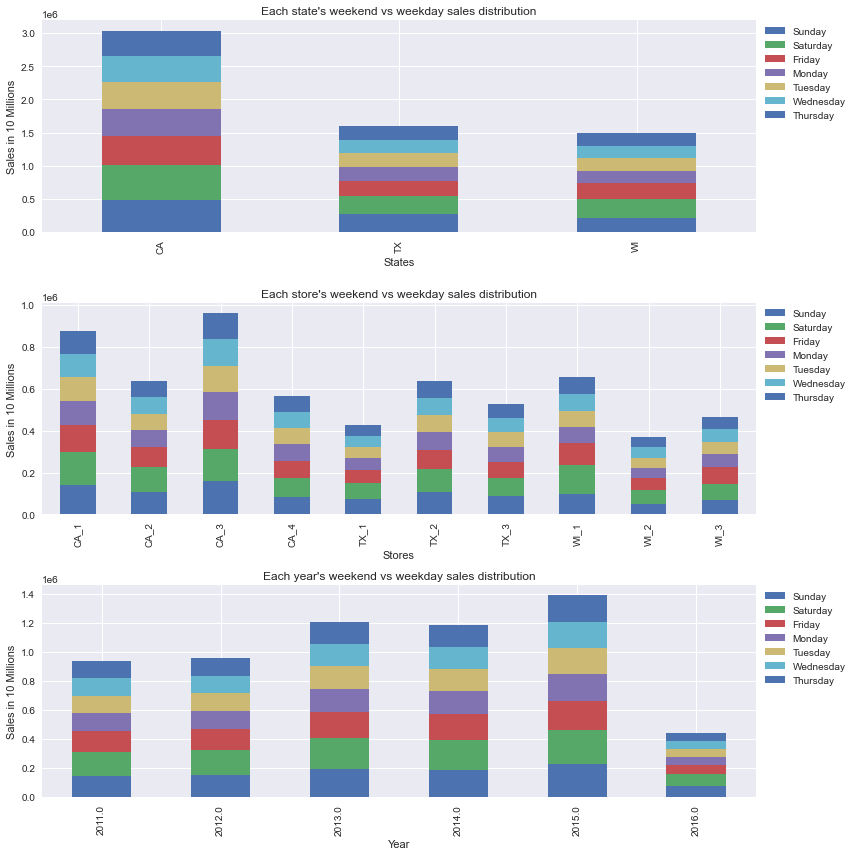

In [11]:
""" Here we get the weekend Vs weekday sales for state, store, year wise and plot each of them """

wdays = ['Sunday','Saturday','Friday','Monday', 'Tuesday', 'Wednesday', 'Thursday']
f, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(12,12))

df_wd_sta = merge_df[['weekday','state_id','sales']]
df_wd_sta_sales = df_wd_sta.groupby(['state_id','weekday']).agg({'sales':'sum'})
df_wd_sta_sales = pd.pivot_table(df_wd_sta_sales, values = 'sales', index=['weekday'], columns = 'state_id').reindex(wdays).T

s = df_wd_sta_sales.plot(kind='bar', stacked=True,ax=ax1)
s.legend(loc='center left', bbox_to_anchor=(1, 0.75), ncol=1)
ax1.set_title('Each state\'s weekend vs weekday sales distribution')
ax1.set_xlabel('States')
ax1.set_ylabel('Sales in 10 Millions')

df_wd_sto = merge_df[['weekday','store_id','sales']]
df_wd_sto_sales = df_wd_sto.groupby(['store_id','weekday']).agg({'sales':'sum'})
df_wd_sto_sales = pd.pivot_table(df_wd_sto_sales, values = 'sales', index=['weekday'], columns = 'store_id').reindex(wdays).T

g = df_wd_sto_sales.plot(kind='bar', stacked=True,ax=ax2)
g.legend(loc='center left', bbox_to_anchor=(1, 0.75), ncol=1)
ax2.set_title('Each store\'s weekend vs weekday sales distribution')
ax2.set_xlabel('Stores')
ax2.set_ylabel('Sales in 10 Millions')

df_wd_year = merge_df[['weekday','year','sales']]
df_wd_year_sales = df_wd_year.groupby(['year','weekday']).agg({'sales':'sum'})
df_wd_year_sales = pd.pivot_table(df_wd_year_sales, values = 'sales', index=['weekday'], columns = 'year').reindex(wdays).T

h = df_wd_year_sales.plot(kind='bar', stacked=True,ax=ax3)
h.legend(loc='center left', bbox_to_anchor=(1, 0.75), ncol=1)
ax3.set_title('Each year\'s weekend vs weekday sales distribution')
ax3.set_xlabel('Year')
ax3.set_ylabel('Sales in 10 Millions')

plt.tight_layout()
plt.show()